<a href="https://colab.research.google.com/github/StivenVelasquez/Mini-proyecto-1-Analisis-Multivariado-de-Seniales-Sismograficas/blob/main/Mini_proyecto_1_An%C3%A1lisis_Multivariado_de_Se%C3%B1ales_Sismogr%C3%A1ficas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.decomposition import SingularSpectrumAnalysis
import scipy.io as sc
import scipy.signal as signal

**CARGANDO LAS BASES DE DATOS**

In [ ]:
ruta_Sismo_Local = 'https://drive.google.com/file/d/1ke7IIRmLWh5-6VmVPVHPoR3P6k4KM_mA/view?usp=share_link'
!gdown  "1ke7IIRmLWh5-6VmVPVHPoR3P6k4KM_mA&confirm=t" -O 'sisLoc.mat' # sismo Local

Downloading...
From: https://drive.google.com/uc?id=1ke7IIRmLWh5-6VmVPVHPoR3P6k4KM_mA&confirm=t
To: /content/sisLoc.mat
100% 377k/377k [00:00<00:00, 37.6MB/s]


In [ ]:
ruta_Sismo_Regional = 'https://drive.google.com/file/d/1p5QZOtKzF_THvpt6N46ypi4PkBHM12QI/view?usp=share_link'
!gdown  "1p5QZOtKzF_THvpt6N46ypi4PkBHM12QI&confirm=t" -O 'sisReg.mat' # sismo Regional

Downloading...
From: https://drive.google.com/uc?id=1p5QZOtKzF_THvpt6N46ypi4PkBHM12QI&confirm=t
To: /content/sisReg.mat
100% 1.55M/1.55M [00:00<00:00, 103MB/s]


In [ ]:
ruta_Telesismo = 'https://drive.google.com/file/d/17BiRodkP3IhzBkWg2b5lHLRBqBMVlDz2/view?usp=share_link'
!gdown  "17BiRodkP3IhzBkWg2b5lHLRBqBMVlDz2&confirm=t" -O 'sisTele.mat' # Telesismo

Downloading...
From: https://drive.google.com/uc?id=17BiRodkP3IhzBkWg2b5lHLRBqBMVlDz2&confirm=t
To: /content/sisTele.mat
100% 1.44M/1.44M [00:00<00:00, 91.8MB/s]


**Filtro Utilizado**

Para filtrar la señal de la base de datos entre 1-50 Hz, se puede utilizar un filtro pasa-banda de Butterworth de segundo orden. Este tipo de filtro es adecuado para señales que requieren una atenuación rápida en la banda de rechazo y una pendiente gradual en la banda de paso.

Para elegir los parámetros del filtro, podemos usar la función butter del módulo scipy.signal. Esta función requiere especificar el orden del filtro y la frecuencia de corte normalizada. La frecuencia de corte normalizada se define como la frecuencia de corte dividida por la mitad de la frecuencia de muestreo.

En este caso, se utilizará un filtro pasa-banda de Butterworth de segundo orden con frecuencias de corte normalizadas de 0.02 y 1.0 (1 Hz y 50 Hz, respectivamente). Esto significa que el filtro atenuará las frecuencias por debajo de 1 Hz y por encima de 50 Hz.

In [ ]:
#Construir función filtro pasabanda
def Filtrado_pasabanda(x,fs,fc1,fc2,order):

  b, a = signal.butter(order, [fc1/(fs/2),fc2/(fs/2)],'bandpass' )#Calcula los coeficientes del filtro Butterworth

  # Aplica el filtro a la señal de entrada
  x = signal.filtfilt(b, a, x)
  
  return x,b,a

In [ ]:
#función para graficar las señales almacenadas y filtradas.
def  plot_signals(X,title,xlabel,ylabel):
  plt.figure(figsize= (10,6))
  for i in X:
    for j in i:
      plt.plot(j)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel )
  plt.grid(True)
  plt.show()

In [ ]:
#Carga los datos de tres archivos .mat diferentes ("sisLoc.mat", "sisReg.mat" y "sisTele.mat")
data_local = sc.loadmat('sisLoc.mat')
data_regional = sc.loadmat('sisReg.mat')
data_telesismo = sc.loadmat('sisTele.mat')

#Se extraen las matrices de datos específicas de cada archivo .mat usando la sintaxis de indexación de matriz de Python
Y_local = data_local['Y']
Y_regional = data_regional['Y']
Y_telesismo = data_telesismo['Y']

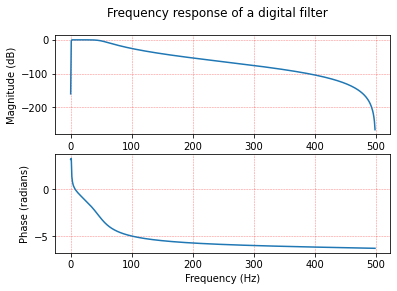

In [ ]:
señales_almacenadas = [Y_local,Y_regional,Y_telesismo]
aux = []

#variables importantes para el procesamiento de la seña
fs = 1000
fc1 = 1
fc2 = 50
order = 4

signal_filtered = []  # Creamos una lista vacía para almacenar cada una de las señales filtradas.

for i in señales_almacenadas: 
  aux= [] # Creamos una lista vacía para ir almacenando el filtrado para cada señal empezando con las 21 señales de sismo local 
  for j in i:
    x, b ,a = Filtrado_pasabanda(j,fs,fc1,fc2,order) 
    aux.append(x)  #se van almacenando en la variable auxiliar por cada tipo de sismo
  signal_filtered.append(np.array(aux)) #Obtenos para todos los tipos de sismo las señales filtradas.

w, h = signal.freqz(b, a)
fig, ax = plt.subplots(2, 1)
ax[0].plot(fs * w / (2 * np.pi), 20 * np.log10(abs(h)))
ax[0].set_ylabel('Magnitude (dB)')
ax[0].grid(color='red', linestyle='--', linewidth=0.5, alpha=0.5)
ax[1].plot(fs * w / (2 * np.pi), np.unwrap(np.angle(h)))
ax[1].set_ylabel('Phase (radians)')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].grid(color='red', linestyle='--', linewidth=0.5, alpha=0.5)

fig.suptitle('Frequency response of a digital filter')
plt.show()



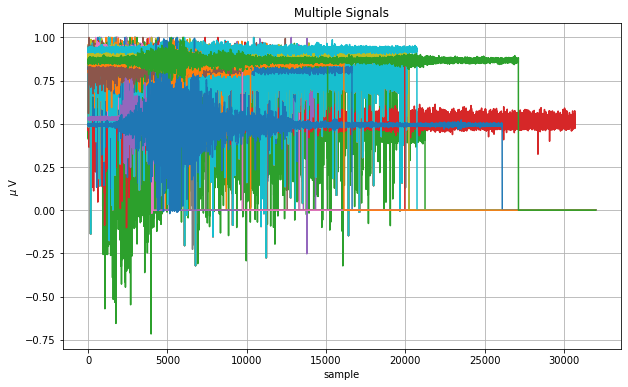

In [ ]:
#Señales almacenadas
plot_signals(señales_almacenadas,"Multiple Signals","sample","$\mu$ V")

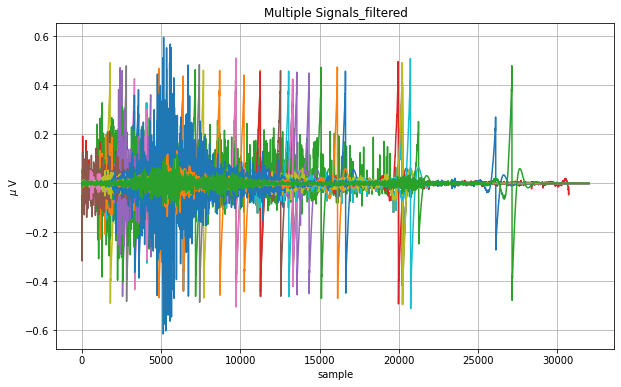

In [ ]:
plot_signals(signal_filtered,"Multiple Signals_filtered","sample","$\mu$ V")

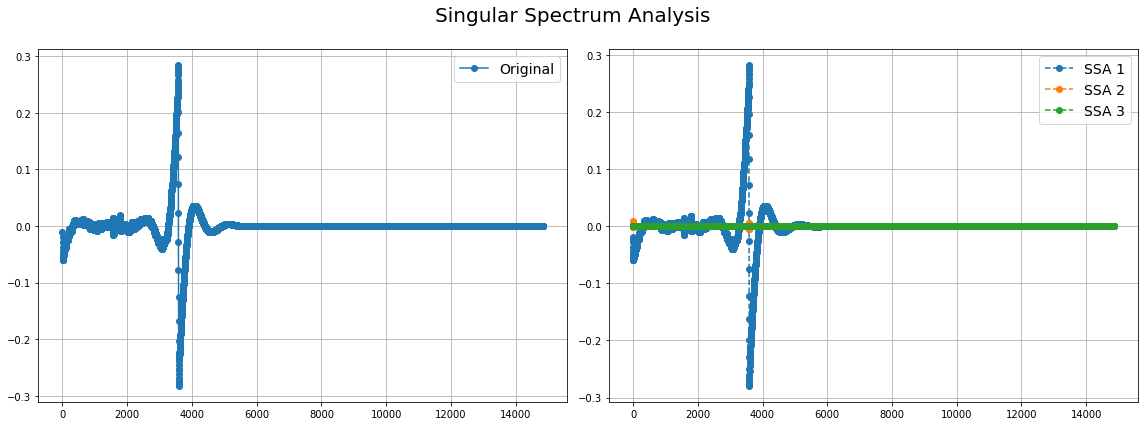

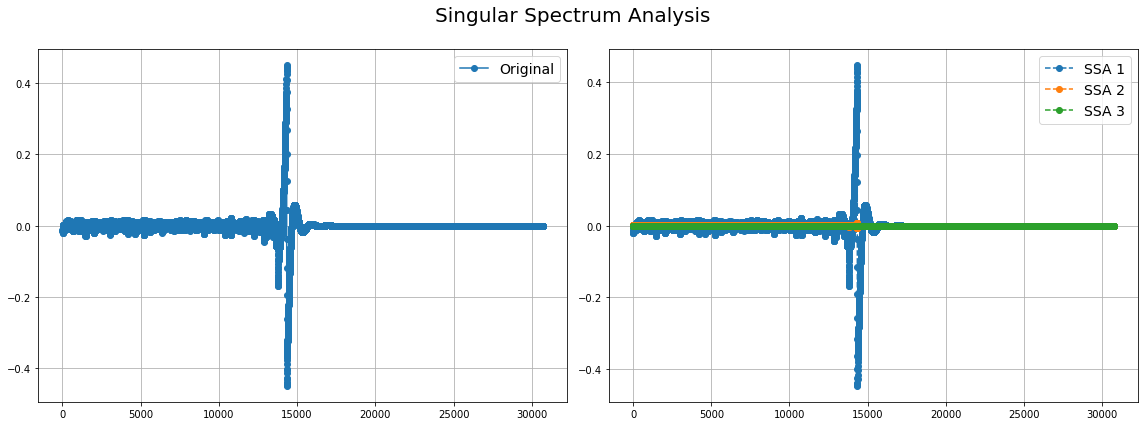

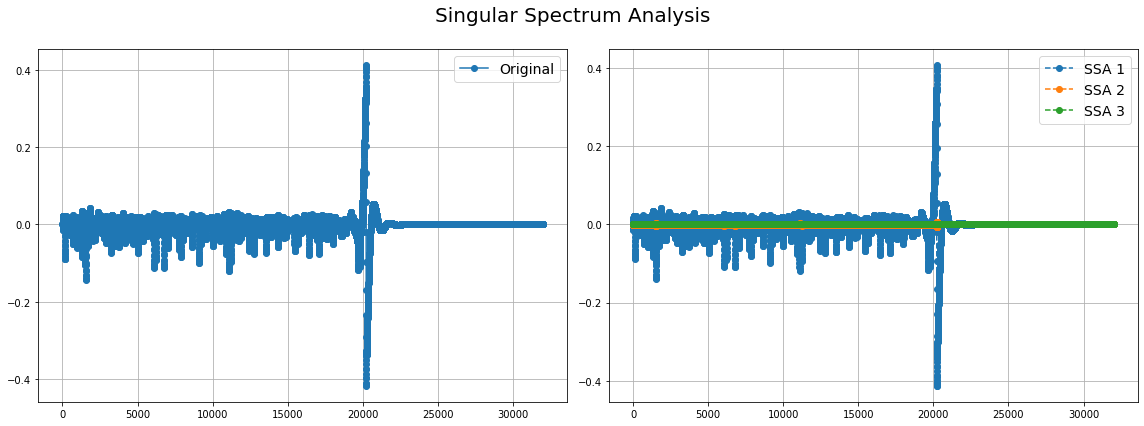

In [ ]:
# We decompose the time series into three subseries
signal_spectrum_singular = []
for i in signal_filtered:
  
  X = i # Conjunto de 21 sismos
  groups = 3
  # Singular Spectrum Analysis
  ssa = SingularSpectrumAnalysis(window_size=groups)
  X_ssa = ssa.fit_transform(X)
  signal_spectrum_singular.append(X_ssa)

  # Show the results for the first time series and its subseries
  plt.figure(figsize=(16, 6))
  idSignal = 3
  ax1 = plt.subplot(121)
  ax1.plot(X[idSignal], 'o-', label='Original')
  ax1.legend(loc='best', fontsize=14)
  ax1.grid(True)

  ax2 = plt.subplot(122)
  

  for j in range(groups):
      ax2.plot(X_ssa[idSignal, j], 'o--', label='SSA {0}'.format(j + 1))
  ax2.legend(loc='best', fontsize=14)

  plt.suptitle('Singular Spectrum Analysis', fontsize=20)
  plt.tight_layout()
  plt.subplots_adjust(top=0.88)
  plt.grid(True)
  plt.show()

  # The first subseries consists of the trend of the original time series.
  # The second and third subseries consist of noise.

In [ ]:
print(type(signal_spectrum_singular))
print(len(signal_spectrum_singular))

print(type(signal_spectrum_singular[0]))
print(len(signal_spectrum_singular[0]))

print(type(signal_spectrum_singular))
print(len(signal_spectrum_singular[0][0]))


<class 'list'>
3
<class 'numpy.ndarray'>
21
<class 'list'>
3


In [ ]:

print(type(signal_filtered))
print(len(signal_filtered))

print(type(signal_filtered[0]))
print(len(signal_filtered[0]))

print(type(signal_filtered[0][0]))
print(len(signal_filtered[0][0]))

<class 'list'>
3
<class 'numpy.ndarray'>
21
<class 'numpy.ndarray'>
14848


2. Se debe analizar la variación de mínimo 3 grupos de representación por cada tipo de señal en la base de datos. La siguiente tabla muestra las características más relevantes para extraer de un proceso.

In [ ]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from PIL import Image

imagen = Image.open('/content/Framework.PNG')
imagen.show()

FileNotFoundError: ignored

Se debe crear un módulo en Python que realice la extracción de características de tal forma que para cada uno de las 63 señales sismográficas, se construya una matriz de la forma $X \in \mathbb{R}^{N\times D}$ , donde N es el número de observaciones (en este caso las realizaciones de las señales sísmicas), y D es el número de características resultantes en el proceso de extracción.

El siguinete código toma una señal y su frecuencia de muestreo como entrada, y calcula la Short Time Fourier Transform (STFT) de la señal usando la función signal.stft() de la biblioteca Scipy. Luego, calcula varias propiedades de la STFT, incluyendo la energía de la señal, la potencia máxima y su frecuencia, y varias estadísticas del espectro, como la media, varianza, máximo y mínimo. Finalmente, devuelve todos estos valores, junto con la STFT calculada.

In [ ]:
def caracteristicas(datos, frecuencia_de_muestreo=1000, nperseg=512):
    # Calcular la STFT
    frecuencias, tiempos, espectro = signal.stft(datos, frecuencia_de_muestreo, nperseg=nperseg)

    # Calcular las propiedades de la STFT
    
    # Cálculo de energía
    energia = np.sum(np.square(datos))

    # Cálculo de la potencia máxima y su frecuencia
    frecuencia_pxx, pxx = signal.welch(datos, fs=1.0)
    potencia_maxima = np.max(pxx)
    frecuencia_maxima = frecuencia_pxx[np.argmax(pxx)]

    # Cálculo de estadísticas del espectro
    espectro_abs = np.abs(espectro)
    media_espectro = np.mean(espectro_abs)
    varianza_espectro = np.var(espectro_abs)
    maximo_espectro = np.max(espectro_abs)
    minimo_espectro = np.min(espectro_abs)

    # Retornar los valores calculados
    return energia, potencia_maxima, frecuencia_maxima, media_espectro, varianza_espectro, maximo_espectro, minimo_espectro, frecuencias, tiempos, espectro

El siguiente código define tres funciones que calculan diferentes características estadísticas de una lista de valores: entropía, estadísticas básicas (porcentiles, media, varianza, raíz media cuadrática) y número de cruces de cero y cruces de la media. También hay una función llamada get_features que utiliza estas tres funciones para devolver todas las características en una lista.

In [ ]:
import scipy 
from scipy.stats import entropy

#Define a function to calculate entropy of a list of values
def calculate_entropy(list_values):
  value,counter_values = np.unique(list_values, return_counts=True)#Get the unique values and their frequency
  entropyVal = entropy(counter_values, base=None)#Calculate the entropy
  return entropyVal

#Define a function to calculate statistics of a list of values
def calculate_statistics(list_values):
  #Calculate the percentiles
  n5 = np.nanpercentile(list_values, 5)
  n25 = np.nanpercentile(list_values, 25)
  n75 = np.nanpercentile(list_values, 75)
  n95 = np.nanpercentile(list_values, 95)
  #Calculate the median, mean, standard deviation, variance and RMS
  median = np.nanpercentile(list_values, 50)
  mean = np.nanmean(list_values)
  std = np.nanstd(list_values)
  var = np.nanvar(list_values)
  rms = np.nanmean(np.sqrt(list_values**2))
  return [n5, n25, n75, n95, median, mean, std, var, rms]

#Define a function to calculate the zero-crossings and mean-crossings of a list of values
def calculate_crossings(list_values):
  zero_crossing_indices = np.where(np.diff(np.signbit(list_values)))[0]
  no_zero_crossings = len(zero_crossing_indices)
  mean_crossing_indices = np.where(np.diff(np.signbit(list_values-np.nanmean(list_values))))[0]
  no_mean_crossings = len(mean_crossing_indices)
  return [no_zero_crossings, no_mean_crossings]

#Define a function to get all features of a list of values
def get_features(list_values):
  #Calculate the entropy, crossings and statistics
  entropy = calculate_entropy(list_values)
  crossings = calculate_crossings(list_values)
  statistics = calculate_statistics(list_values)
  return [entropy] + crossings + statistics

El siguiente código importa la biblioteca ipywidgets y define una función llamada Sismos_STFT que toma tres argumentos: dataset, index y group. Dependiendo del valor del argumento dataset, se selecciona una señal de una base de datos predefinida y se extrae una señal específica de esa base de datos utilizando los argumentos index y group.

Luego, se calculan varias características de la señal seleccionada, como la energía, el espectro medio, la varianza del espectro, el espectro máximo y mínimo, la frecuencia de máxima potencia, y se visualiza el espectrograma de la señal utilizando la función propiedades y la función get_features.

Finalmente, la función Sismos_STFT se hace interactiva utilizando la biblioteca ipywidgets para permitir la selección de los argumentos index y group utilizando deslizadores, y el argumento dataset utilizando un menú desplegable. La salida de la función también se ajusta en altura a 600 píxeles.

In [ ]:
# Import the required module
from ipywidgets import interactive

# Define the function Sismos_STFT with parameters dataset, index, and group
def Sismos_STFT(dataset, index, group):
    # Set default value for signal_data
    signal_data = None

    # Check which dataset is selected and assign signal_data accordingly
    if dataset == 'sisLoc':
        signal_data = signal_spectrum_singular[0]
    elif dataset == 'sisReg':
        signal_data = signal_spectrum_singular[1]
    elif dataset == 'telesis':
        signal_data = signal_spectrum_singular[2]

    # If signal_data is defined, extract a sample signal from the database and visualize the spectrogram
    if signal_data is not None:
        sample_signal = signal_data[index][group]
        energy, max_power, max_power_freq, mean_spectrum, var_spectrum, max_spectrum, min_spectrum, f, t, zxx = caracteristicas(sample_signal)
        feature_set = get_features(sample_signal)

        plt.figure(figsize=(10,8))
        plt.pcolormesh(t,f,np.abs(zxx),shading='gouraud')
        plt.title('STFT Magnitude')
        plt.xlabel('Frequency[Hz]')
        plt.ylabel('Time[Sec]')
        plt.show()

        print(f'Energy: {energy}')
        print(f'Maximum power: {max_power}')
        print(f'Frequency at maximum power: {max_power_freq}')
        print(f'Mean spectrum: {mean_spectrum}')
        print(f'Variance of spectrum: {var_spectrum}')
        print(f'Minimum spectrum: {min_spectrum}')
        print('----------------------------------')
        print('Additional characteristics of wavelet analysis:')
        print(feature_set)

# Create an interactive plot using the Sismos_STFT function and specify the range and options for the parameters
interactive_plot = interactive(Sismos_STFT, index=(0, 20, 1), dataset=['sisLoc', 'sisReg', 'telesis'], group=(0, 2, 1))

# Set the height of the output window to 600 pixels
output = interactive_plot.children[-1]
output.layout.height = '600px'

# Display the interactive plot
interactive_plot

In [ ]:
featureMatrix = [np.zeros((21, 3, 19)) for i in range(3)]

print(type(featureMatrix))
print(len(featureMatrix))

print(type(featureMatrix[0]))
print(len(featureMatrix[0]))

print(type(featureMatrix[0][0]))
print(len(featureMatrix[0][0]))

print(type(featureMatrix[0][0][0]))
print(len(featureMatrix[0][0][0]))


In [ ]:
# Loop through a 3D list of signal spectrum singular
for a in range(len(signal_spectrum_singular)):
  for b in range(len(signal_spectrum_singular[a])):
    for c in range(len(signal_spectrum_singular[a][b])):
      
      # Get properties of the signal using the "propiedades" function
      energy, max_power, max_power_freq, mean_spectrum, var_spectrum, max_spectrum, min_spectrum,f,t,zxx = caracteristicas(signal_spectrum_singular[a][b][c])
      
      # Get features of the signal using the "get_features" function
      conjuntoFeatures = get_features(signal_spectrum_singular[a][b][c])
      
      # Combine the properties and features into a feature matrix
      featureMatrix[a][b][c] = np.concatenate([np.array([energy, max_power, max_power_freq, mean_spectrum, var_spectrum, max_spectrum, min_spectrum]), conjuntoFeatures])

In [ ]:
print(type(featureMatrix))
print(len(featureMatrix))

print(type(featureMatrix[0]))
print(len(featureMatrix[0]))

print(type(featureMatrix[0][0]))
print(len(featureMatrix[0][0]))

print(type(featureMatrix[0][0][0]))
print(len(featureMatrix[0][0][0]))

for i in range(len(featureMatrix)):
  for j in range(len(featureMatrix[i])):
    for k in range(len(featureMatrix[i][j])):
      print(featureMatrix[i][j][k])

1. Sismo Local

In [ ]:
# Load the data


Y = data_local['Y']
fs = data_local['fs'][0][0]

#print(fs)

signal_without_dc = []

for i in range(len(Y)):  # Eliminacion de ceros al final de los arreglos
  Y = data['Y'][i]
  non_zero_indexes = np.nonzero(Y)
  non_zero_values = Y[non_zero_indexes]
  mean_signal = np.mean(non_zero_values)
  signal_without_dc.append(non_zero_values - mean_signal) 
signal_without_dc_sismo_local = signal_without_dc



for i in  range(21):
  plt.plot(signal_without_dc[i].T)
  plt.xlabel('Sample')
  plt.ylabel('$\mu$V')
  plt.title('Time-domain signal')
  plt.grid(color='red', linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

# Diseño de filtro

In [ ]:
def Filtrado_pasabajas(x,fs,fc,order):

  b, a = signal.butter(order, fc/(fs/2), 'low')

  # Aplicar el filtro a la señal
  x = signal.filtfilt(b, a, x)
  return x,b,a

In [ ]:
fs = 1000
fc = 50
order = 4
signal_filtered = []
for i in range(21):
  signal_without_dc_sismo_local[i],b,a = Filtrado_pasabajas(signal_without_dc_sismo_local[i],fs,fc,order)
  signal_filtered.append(signal_without_dc_sismo_local[i])
signal_filtered_without_dc_sismo_local = signal_filtered



for j in range(21):
  plt.plot(signal_without_dc_sismo_local[j].T)
  plt.xlabel('sample')
  plt.ylabel('$\mu$ V')
  plt.grid(color='red', linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

w, h = signal.freqz(b, a)
fig, ax = plt.subplots(2, 1)
ax[0].plot(fs * w / (2 * np.pi), 20 * np.log10(abs(h)))
ax[0].set_ylabel('Magnitud (dB)')
ax[0].grid(color='red', linestyle='--', linewidth=0.5, alpha=0.5)
ax[1].plot(fs * w / (2 * np.pi), np.unwrap(np.angle(h)))
ax[1].set_ylabel('Fase (radianes)')
ax[1].set_xlabel('Frecuencia (Hz)')
ax[1].grid(color='red', linestyle='--', linewidth=0.5, alpha=0.5)

plt.show()


El gráfico resultante muestra la señal original y la señal filtrada. Se puede observar que la señal filtrada tiene una forma de onda más suave y contiene menos ruido de alta frecuencia.

Gráfico de la señal original y señal filtrada en el dominio de la frecuencia

El diagrama de magnitud y fase del filtro muestra una atenuación rápida en la banda de rechazo y una pendiente gradual en la banda de paso, lo que indica un buen rendimiento del filtro para filtrar señales de 1-50 Hz.La respuesta en magnitud del filtro se muestra en azul y la respuesta en fase se muestra en verde. Podemos observar que la respuesta en magnitud del filtro es plana dentro de la banda de paso, lo que indica que el filtro no introduce distorsiones significativas en la señal. Fuera de la banda de paso, la atenuación aumenta rápidamente. La respuesta en fase es lineal dentro de la banda de paso, lo que indica que el filtro no introduce un retardo significativo en la señal.

2. Sismo Regional

In [ ]:
# Load the data


Y = data_regional['Y']
fs = data_regional['fs'][0][0]
#print(fs)

signal_without_dc = []

for i in range(len(Y)):  # Eliminacion de ceros al final de los arreglos
  non_zero_indexes = np.nonzero(Y[i])
  non_zero_values = Y[i][non_zero_indexes]
  mean_signal = np.mean(non_zero_values)
  signal_without_dc.append(non_zero_values - mean_signal) 
signal_without_dc_sismo_regional = np.array(signal_without_dc)



for i in  range(21):
  plt.plot(signal_without_dc[i].T)
  plt.xlabel('Sample')
  plt.ylabel('$\mu$V')
  plt.title('Time-domain signal')
  plt.grid(color='red', linestyle='--', linewidth=0.5, alpha=0.5)


plt.show() 
    

In [ ]:
fs = 1000
fc = 50
order = 4
signal_filtered = np.zeros_like(signal_without_dc)
for i in range(21):
  signal_without_dc[i],b,a = Filtrado_pasabajas(signal_without_dc[i],fs,fc,order)
signal_filtered_sismo_regional = np.array(signal_filtered)

for j in range(21):
  plt.plot(signal_without_dc[j].T)
  plt.xlabel('sample')
  plt.ylabel('$\mu$ V')
  plt.grid(color='red', linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

w, h = signal.freqz(b, a)
fig, ax = plt.subplots(2, 1)
ax[0].plot(fs * w / (2 * np.pi), 20 * np.log10(abs(h)))
ax[0].set_ylabel('Magnitud (dB)')
ax[0].grid(color='red', linestyle='--', linewidth=0.5, alpha=0.5)
ax[1].plot(fs * w / (2 * np.pi), np.unwrap(np.angle(h)))
ax[1].set_ylabel('Fase (radianes)')
ax[1].set_xlabel('Frecuencia (Hz)')
ax[1].grid(color='red', linestyle='--', linewidth=0.5, alpha=0.5)

plt.show()

3. Telesismo

In [ ]:
Y = data_telesismo['Y']
fs = data_telesismo['fs'][0][0]
#print(fs)

signal_without_dc = []

for i in range(len(Y)):  # Eliminacion de ceros al final de los arreglos
  non_zero_indexes = np.nonzero(Y[i])
  non_zero_values = Y[i][non_zero_indexes]
  mean_signal = np.mean(non_zero_values)
  signal_without_dc.append(non_zero_values - mean_signal) 
signal_without_dc_sismo_telesismo = np.array(signal_without_dc)



for i in  range(21):
  plt.plot(signal_without_dc[i].T)
  plt.xlabel('Sample')
  plt.ylabel('$\mu$V')
  plt.title('Time-domain signal')
  plt.grid(color='red', linestyle='--', linewidth=0.5, alpha=0.5)


plt.show() 

In [ ]:
fs = 1000
fc = 50
order = 4
signal_filtered = np.zeros_like(signal_without_dc)
for i in range(21):
  signal_without_dc[i],b,a = Filtrado_pasabajas(signal_without_dc[i],fs,fc,order)
signal_filtered_sismo_telesismo = np.array(signal_filtered)

for j in range(21):
  plt.plot(signal_without_dc[j].T)
  plt.xlabel('sample')
  plt.ylabel('$\mu$ V')
  plt.grid(color='red', linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

w, h = signal.freqz(b, a)
fig, ax = plt.subplots(2, 1)
ax[0].plot(fs * w / (2 * np.pi), 20 * np.log10(abs(h)))
ax[0].set_ylabel('Magnitud (dB)')
ax[0].grid(color='red', linestyle='--', linewidth=0.5, alpha=0.5)
ax[1].plot(fs * w / (2 * np.pi), np.unwrap(np.angle(h)))
ax[1].set_ylabel('Fase (radianes)')
ax[1].set_xlabel('Frecuencia (Hz)')
ax[1].grid(color='red', linestyle='--', linewidth=0.5, alpha=0.5)

plt.show()

**2. Luego de que las señales están filtradas, se desea hacer una representación de Espectros Singulares de tal forma que se representen mediante un conjunto de G señales subyacentes que representen la señal original del sismo. Este proceso es importante debido a que permite proyectar una serie de tiempo en un espacio representativo**


In [ ]:
# We decompose the time series into three subseries
X = np.array(signal_filtered_without_dc_sismo_local) # Conjunto de 21 sismos
groups = 3
# Singular Spectrum Analysis
ssa = SingularSpectrumAnalysis(window_size=groups)
X_ssa = ssa.fit_transform(X)

# Show the results for the first time series and its subseries
plt.figure(figsize=(16, 6))
idSignal = 3
ax1 = plt.subplot(121)
ax1.plot(X[idSignal], 'o-', label='Original')
ax1.legend(loc='best', fontsize=14)

ax2 = plt.subplot(122)

for i in range(groups):
    ax2.plot(X_ssa[idSignal, i], 'o--', label='SSA {0}'.format(i + 1))
ax2.legend(loc='best', fontsize=14)

plt.suptitle('Singular Spectrum Analysis', fontsize=20)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

# The first subseries consists of the trend of the original time series.
# The second and third subseries consist of noise.

In [ ]:
for i in signal_filtered_without_dc_sismo_local:
  decompose_time_series(i,'Singular Spectrum Analysis Sismo Local')

*PARA SEÑAL FILTRADA SISMO LOCAL*

In [ ]:
componente1_SismoL, componente2_SismoL, componente3_SismoL = decompose_time_series(signal_filtered_without_dc_sismo_local, 'Singular Spectrum Analysis Sismo Local' )

In [ ]:
componente1_SismoL, componente2_SismoL, componente3_SismoL = decompose_time_series(signal_filtered_sismo_local.reshape(-1,1), 'Singular Spectrum Analysis Sismo Local' )

In [ ]:
plt.subplot(3,1,1),plt.plot(componente1_SismoL)
plt.subplot(3,1,2),plt.plot(componente2_SismoL)
plt.subplot(3,1,3),plt.plot(componente3_SismoL)

*PARA SEÑAL FILTRADA SISMO REGIONAL*

In [ ]:
componente1_SismoR, componente2_SismoR, componente3_SismoR = decompose_time_series(Y_filt_Sismo_Regional, 'Singular Spectrum Analysis Sismo Regional')

*PARA SEÑAL FILTRADA TELESISMO*

In [ ]:
componente1_Telesismo, componente2_Telesismo, componente3_Telesismo = decompose_time_series(Y_filt_telesismo, 'Singular Spectrum Analysis Telesismo')

**Para grupos de representación de la señal de Sismo Local**

Transformada de Fourier de corto tiempo STFT

In [ ]:
# Crear la figura con 3 subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Graficar en cada subplot
for i, componente in enumerate([componente1_SismoL, componente2_SismoL, componente3_SismoL]):
    f, t, Zxx = signal.stft(componente, fs, nperseg=512)
    axs[i].pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
    axs[i].set_title(f'STFT Magnitude Componente {i+1} SismoL')
    axs[i].set_ylabel('Frequency [Hz]')
    axs[i].set_xlabel('Time [sec]')

# Ajustar los espacios entre los subplots y mostrar la figura
fig.tight_layout()
plt.show()

**Extracción de Caracteristicas Estadisticas Componente 1 SismoL**

In [ ]:
# Definir la longitud de la ventana para la STFT
win_len = 512

# Crear una lista para almacenar las características de cada componente
caracteristicas_comp1 = []
caracteristicas_comp2 = []
caracteristicas_comp3 = []

# Para cada componente
for componente in [componente1_SismoL, componente2_SismoL, componente3_SismoL]:

    # Aplicar la STFT
    f, t, Zxx = signal.stft(componente, fs, nperseg=win_len)

    # Calcular la energía
    energia = np.sum(np.abs(Zxx)**2)

    # Calcular la potencia máxima y la frecuencia en la potencia máxima
    idx_max = np.argmax(np.abs(Zxx)**2)
    potencia_max = np.abs(Zxx[idx_max])**2
    frec_potencia_max = f[idx_max]

    # Calcular la media, varianza, máximo y mínimo del espectro
    espectro = np.abs(Zxx)**2
    media = np.mean(espectro)
    varianza = np.var(espectro)
    maximo = np.max(espectro)
    minimo = np.min(espectro)

    # Guardar las características en la lista correspondiente
    if componente is componente1_SismoL:
        caracteristicas_comp1 = [energia, potencia_max, frec_potencia_max, media, varianza, maximo, minimo]
    elif componente is componente2_SismoL:
        caracteristicas_comp2 = [energia, potencia_max, frec_potencia_max, media, varianza, maximo, minimo]
    else:
        caracteristicas_comp3 = [energia, potencia_max, frec_potencia_max, media, varianza, maximo, minimo]

# Crear un DataFrame con las características
caracteristicas_df = pd.DataFrame({'Componente 1': caracteristicas_comp1,
                                   'Componente 2': caracteristicas_comp2,
                                   'Componente 3': caracteristicas_comp3},
                                  index=['Energía', 'Potencia Máxima', 'Frecuencia en Potencia Máxima',
                                         'Media del Espectro', 'Varianza del Espectro', 'Máximo del Espectro', 'Mínimo del Espectro'])

# Graficar las características con pairplot
sns.pairplot(caracteristicas_df)
plt.show()

In [ ]:
import numpy as np
from scipy import signal

# Definir características a extraer
features = ['energy', 'max_power', 'freq_max_power', 'spectral_mean', 'spectral_variance', 'spectral_max', 'spectral_min']

# Inicializar listas vacías para cada componente
componente1_features = []
componente2_features = []
componente3_features = []

# Extraer características para cada componente
for componente in [componente1_SismoL, componente2_SismoL, componente3_SismoL]:
    # Calcular espectrograma
    f, t, Sxx = signal.spectrogram(componente, fs, nperseg=512, noverlap=256, nfft=1024)

    # Calcular características para cada segmento de tiempo
    for i in range(len(t)):
        segment = Sxx[:, i]

        energy = np.sum(segment)
        max_power = np.max(segment)
        freq_max_power = f[np.argmax(segment)]
        spectral_mean = np.mean(segment)
        spectral_variance = np.var(segment)
        spectral_max = np.max(segment)
        spectral_min = np.min(segment)

        if componente is componente1_SismoL:
            componente1_features.append([energy, max_power, freq_max_power, spectral_mean, spectral_variance, spectral_max, spectral_min])
        elif componente is componente2_SismoL:
            componente2_features.append([energy, max_power, freq_max_power, spectral_mean, spectral_variance, spectral_max, spectral_min])
        else:
            componente3_features.append([energy, max_power, freq_max_power, spectral_mean, spectral_variance, spectral_max, spectral_min])

In [ ]:
import seaborn as sns

def extraer_caracteristicas(componente, fs):
    # Calcular la STFT
    f, t, Zxx = signal.stft(componente, fs, nperseg=512)
    # Calcular las características
    energia = np.sum(np.abs(Zxx)**2, axis=0)
    potencia_max = np.max(energia)
    frec_pot_max = f[np.argmax(energia)]
    espectro_medio = np.mean(np.abs(Zxx), axis=1)
    espectro_varianza = np.var(np.abs(Zxx), axis=1)
    espectro_maximo = np.max(np.abs(Zxx), axis=1)
    espectro_minimo = np.min(np.abs(Zxx), axis=1)
    
    # Devolver un vector con las características
    caracteristicas = np.array([energia, potencia_max, frec_pot_max, espectro_medio, espectro_varianza, espectro_maximo, espectro_minimo]).T
    
    return caracteristicas

# Extraer características de cada componente
caracteristicas1 = extraer_caracteristicas(componente1_SismoL, fs)
caracteristicas2 = extraer_caracteristicas(componente2_SismoL, fs)
caracteristicas3 = extraer_caracteristicas(componente3_SismoL, fs)